In [2]:
import requests
import pandas as pd
import json

In [3]:
bersatulawancovid = ['Cuci Tangan', 'Pakai Masker', 'Jaga jarak']
print(bersatulawancovid)

['Cuci Tangan', 'Pakai Masker', 'Jaga jarak']


In [5]:
#Mengakses Api Covid-19.go.id
import requests
resp = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
print(resp)

<Response [200]>


In [7]:
#Header API
print(resp.headers)

{'Server': 'nginx', 'Date': 'Sun, 14 Nov 2021 11:41:05 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Sun, 14 Nov 2021 11:40:59 GMT', 'ETag': 'W/"6190f5cb-2329c"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [ ]:
#Mengekstrak isi respon
cov_id_raw = resp.json()
print(cov_id_raw)

In [5]:
#Mengekstrak isi respon 2

import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json', verify=False)
cov_id_raw = resp.json()

print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [6]:
#Analisa Data
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json', verify=False)
cov_id_raw = resp.json()
cov_id_update = cov_id_raw['update']

print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Tanggal pembaharuan data penambahan kasus   : 2021-11-16
Jumlah penambahan kasus sembuh : 515
Jumlah penambahan kasus meninggal : 15
Jumlah total kasus positif hingga saat ini : 4251423
Jumlah total kasus meninggal hingga saat ini: 143685


In [15]:
#Memahami kasus Covid-19 Jawa Barat
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 706799
Persentase kematian akibat COVID-19 di Jawa Barat         : 2.081780.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 97.671615.2%


In [17]:
#Memperoleh informasi lebih lengkap

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       620 non-null    int64
 1   KASUS                         620 non-null    int64
 2   MENINGGAL                     620 non-null    int64
 3   SEMBUH                        620 non-null    int64
 4   DIRAWAT_OR_ISOLASI            620 non-null    int64
 5   AKUMULASI_KASUS               620 non-null    int64
 6   AKUMULASI_SEMBUH              620 non-null    int64
 7   AKUMULASI_MENINGGAL           620 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  620 non-null    int64
dtypes: int64(9)
memory usage: 43.7 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0   

In [32]:
#Menjinakkan Data
#Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
#Merubah format penulisan semua kolom menjadi huruf kecil
#Mengganti nama kolom kasus menjadi kasus_baru
#Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

import numpy as np
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                          if item.startswith('AKUMULASI') or 
                                          item.startswith('DIRAWAT')
                                         ])
                .rename(columns=str.lower)
                .rename(columns={'kasus': 'kasus_baru'})
                 )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print("Data Lima Teratas:\n", cov_jabar_tidy.head())

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Data Lima Teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

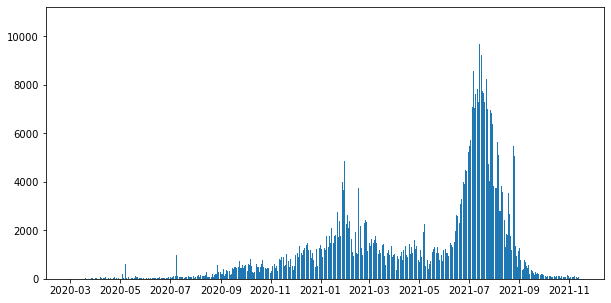

In [33]:
#Menunjukkan Melalui Gambar

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
<ipython-input-36-d2e873c36730>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

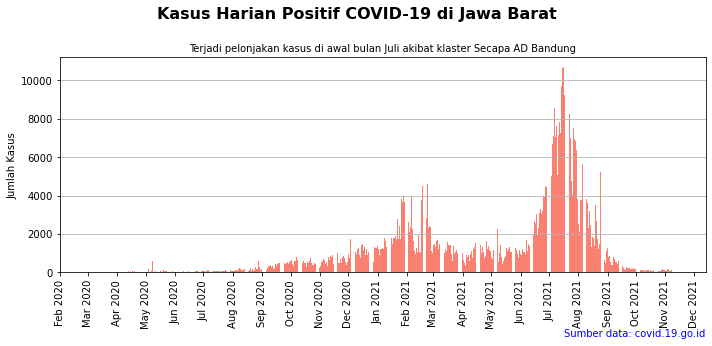

In [36]:
#Informasi pada Grafik

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
<ipython-input-35-a70a368b3eff>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

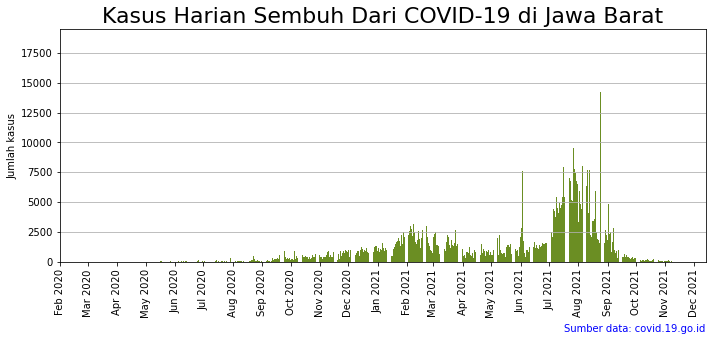

In [35]:
#Grafik untuk Kasus Sembuh

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
<ipython-input-38-4dfedffc51df>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

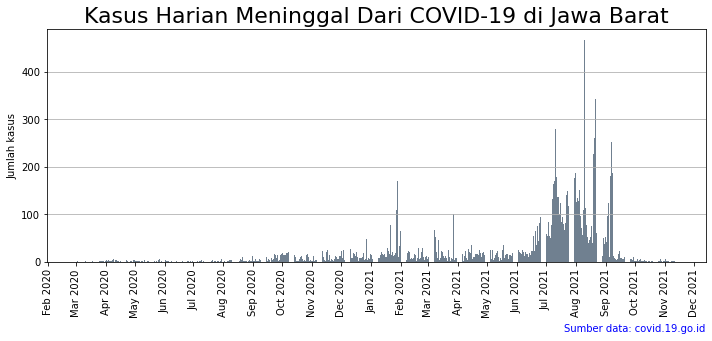

In [38]:
#Grafik untuk Kasus Meninggal

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [8]:
#Apakah Pekan ini Lebih Baik?
#Lima data teratas Covid-19 di Jabar dalam pekanan

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x:x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     90 non-null     int64
 1   pekan_ke  90 non-null     int64
 2   jumlah    90 non-null     int64
dtypes: int64(3)
memory usage: 2.2 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


In [10]:
#Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama jumlah_pekanlalu.
#Mengganti nilai NaN pada kolom jumlah_pekanlalu dengan nilai 0
#Melakukan komparasi antara kolom jumlah dengan kolom jumlah_pekanlalu. 
#Hasil komparasi ini disimpan dalam kolom baru dengan nama lebih_baik, 
#isinya adalah True apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Figure size 432x288 with 0 Axes>

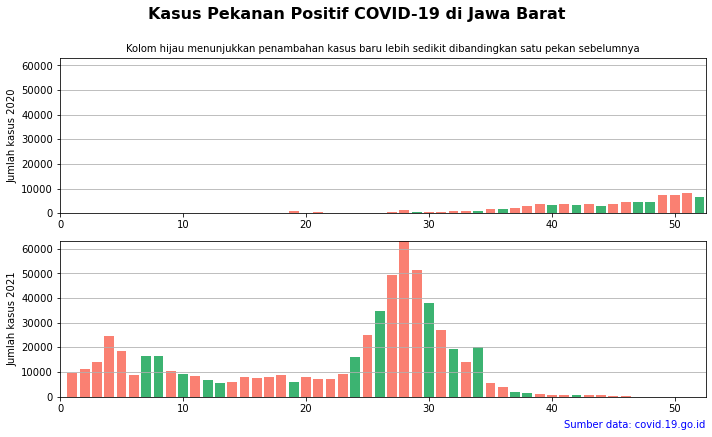

In [2]:
#Membuat Bar Chart

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, 
						figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
			 y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
	ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]],
		   x='pekan_ke', height='jumlah',
		   color=['mediumseagreen' if x is True else 'salmon'
			 		for x in cov_jabar_pekanan['lebih_baik']])
	if i == 0:
		ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', 
					 fontsize=10)
	elif i == jml_tahun_terjadi_covid19-1:
		ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue', 
			 ha='right', transform=ax.transAxes)
	
	ax.set_xlim([0, 52.5])
	ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
	ax.set_xlabel('')
	ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
	ax.grid(axis='y')
				  
plt.tight_layout()
plt.show()

In [3]:
#Jumlah kasus aktif

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
619 2021-11-12             1490            690596                14714
620 2021-11-13             1470            690663                14716
621 2021-11-14             1457            690699                14718
622 2021-11-15             1195            690988                14718
623 2021-11-16             1146            691084                14721


C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
<ipython-input-1-bd4946dd0e56>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

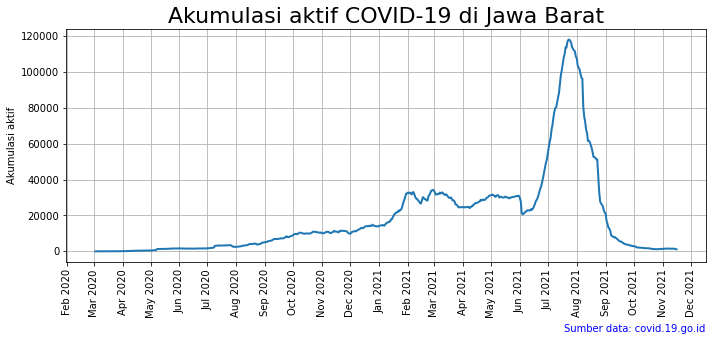

In [1]:
#Membuat Line Chart Akumulasi aktif

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

C:\Users\DC\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Figure size 432x288 with 0 Axes>

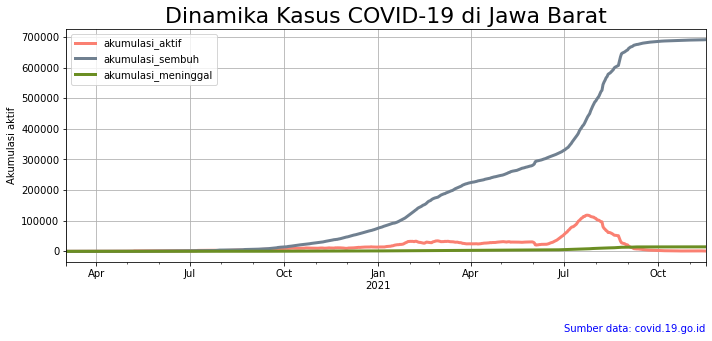

In [2]:
#Menggali lebih dalam dinamika kasus covid-19 di Jabar

import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts= cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
						    color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
			 fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
	   	ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()